In [ ]:
!python -m pip install paddlepaddle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [ ]:
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=0f0e1e8a00479fa12f7d8ae9c54238d7aca3bb573ea801ffa7a109282c727acd
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
     

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt # for images
from google.colab.patches import cv2_imshow #Specific to Google Colab, it allows displaying images in the Colab notebook.
import cv2
import os # for folder directory navigation
import numpy as np
import traceback
import json
import csv

In [ ]:
# use_angle_cls=True:
# This parameter enables the angle classification feature of the OCR model.
# It allows the model to detect and correct text that is not horizontally aligned (e.g., rotated or skewed text)
ocr_model = PaddleOCR(use_angle_cls=True, lang='en')


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:16<00:00, 232.69it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:19<00:00, 513.88it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:03<00:00, 650.56it/s]

[2024/11/20 06:44:52] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [ ]:
img_path = 'doc.png'
img_path

'doc.png'

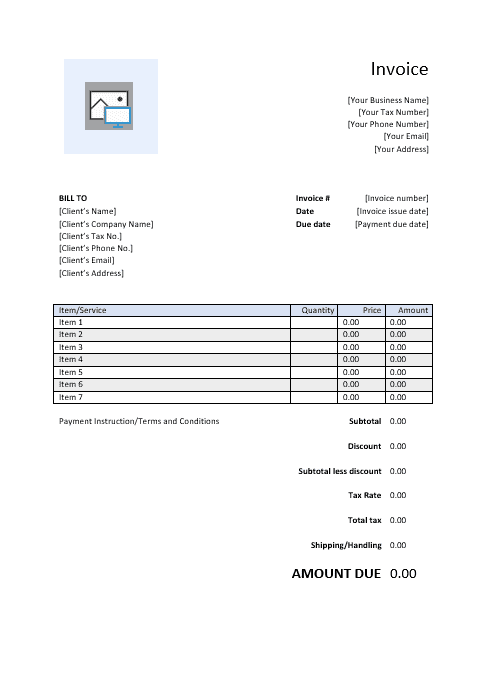

In [ ]:
img = cv2.imread(img_path ,cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
from pprint import pprint # each iteration on next line instead of single line
# detect the image
# %timeit A magic command in IPython or Jupyter Notebook that measures the average execution time of a line or block of code.
# It runs the specified code multiple times and provides the mean runtime, which is helpful for performance testing.
result = ocr_model.ocr(img_path , cls=True)

[2024/11/20 06:44:54] ppocr DEBUG: dt_boxes num : 54, elapsed : 0.3147561550140381
[2024/11/20 06:44:54] ppocr DEBUG: cls num  : 54, elapsed : 0.17296075820922852
[2024/11/20 06:44:58] ppocr DEBUG: rec_res num  : 54, elapsed : 3.1431546211242676


In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 71829, done.
remote: Counting objects: 100% (20898/20898), done.
remote: Compressing objects: 100% (4240/4240), done.
remote: Total 71829 (delta 17189), reused 20147 (delta 16656), pack-reused 50931 (from 1)
Receiving objects: 100% (71829/71829), 485.34 MiB | 27.46 MiB/s, done.
Resolving deltas: 100% (53033/53033), done.
Updating files: 100% (1994/1994), done.


In [ ]:
font = 'PaddleOCR/doc/fonts/latin.ttf'

In [ ]:
for i in result:
  pprint(i)

[[[[369.0, 58.0], [430.0, 61.0], [430.0, 78.0], [368.0, 76.0]],
  ('Invoice', 0.9984985589981079)],
 [[[346.0, 94.0], [431.0, 94.0], [431.0, 107.0], [346.0, 107.0]],
  ('[Your Business Name]', 0.9995578527450562)],
 [[[357.0, 106.0], [430.0, 108.0], [430.0, 118.0], [356.0, 117.0]],
  ('[Your Tax Number]', 0.9945240020751953)],
 [[[346.0, 118.0], [431.0, 118.0], [431.0, 131.0], [346.0, 131.0]],
  ('[Your Phone Number]', 0.9995384216308594)],
 [[[380.0, 128.0], [431.0, 130.0], [431.0, 144.0], [379.0, 142.0]],
  ('[Your Email]', 0.9974491596221924)],
 [[[373.0, 145.0], [430.0, 145.0], [430.0, 155.0], [373.0, 155.0]],
  ('[Your Address]', 0.9995683431625366)],
 [[[57.0, 193.0], [89.0, 193.0], [89.0, 203.0], [57.0, 203.0]],
  ('BILL TO', 0.998543918132782)],
 [[[293.0, 191.0], [332.0, 194.0], [331.0, 204.0], [293.0, 202.0]],
  ('Invoice #', 0.9230979084968567)],
 [[[363.0, 194.0], [429.0, 194.0], [429.0, 203.0], [363.0, 203.0]],
  ('[Invoice number]', 0.9705584049224854)],
 [[[58.0, 206.0],

In [ ]:
boxes = [line[0] for line in result]
boxes

[[[[369.0, 58.0], [430.0, 61.0], [430.0, 78.0], [368.0, 76.0]],
  ('Invoice', 0.9984985589981079)]]

In [ ]:
scores = [line[1][1] for line in result]
scores

[('[Your Business Name]', 0.9995578527450562)]

In [ ]:
# boxes = [] What it does: Extracts the first element (res[0]) of each res from all the lines in result.
boxes = [res[0] for line in result for res in line]
#  texts = [] What it does: Extracts the first element of the second part (res[1][0]) of each res from all the lines in result.
texts = [res[1][0] for line in result for res in line]
#  scores = [] What it does: Extracts the second element of the second part (res[1][1]) of each res from all the lines in result.
scores = [res[1][1] for line in result for res in line]

In [ ]:
import numpy as np
from PIL import Image

# Print the extracted texts
print("Extracted Texts:")
for text in texts:
    print(text)

# print(texts)

# Load the image using PIL
# for ensuring the image is in standard form
image = Image.open(img_path).convert('RGB')

fonts = 'PaddleOCR/doc/fonts/latin.ttf'
# Draw OCR results (with red bounding boxes and annotations)
im_show = draw_ocr(image, boxes, texts, scores, font_path=fonts)

# Convert the array back to a PIL image and save
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')
print("Result saved as 'result.jpg'")


Extracted Texts:
Invoice
[Your Business Name]
[Your Tax Number]
[Your Phone Number]
[Your Email]
[Your Address]
BILL TO
Invoice #
[Invoice number]
[Clients Name]
Date
[Invoice issue date]
[Clients Company Name]
Due date
[Payment due date]
[Clients Tax No.]
[Clients Phone No.]
[Clients Email]
[Client's Address]
Item/Service
Item 1
Quantity
Price
0.00
Amount
0.00
Item 2
0.00
0.00
Item 3
0.00
0.00
Item 4
0.00
0.00
Item 5
0.00
0.00
Item 6
0.00
0.00
Item 7
0.00
0.00
Payment Instruction/Terms and Conditions
Subtotal
0.00
Discount
0.00
Subtotal less discount0.00
Tax Rate0.00
Total tax0.00
Shipping/Handling0.00
AMOUNT DUE O.OO
Result saved as 'result.jpg'


In [ ]:
import re
import json
import csv

def categorize_value(text):
    """
    Categorizes the extracted text based on its content.
    """
    # Predefined conditions for categorization
    text_lower = text.lower()

    if "name" in text_lower or "bill to" in text_lower:
        return "name"
    elif "address" in text_lower:
        return "address"
    elif "invoice" in text_lower:
        return "invoice"
    elif "tax" in text_lower or "tax number" in text_lower:
        return "tax"
    elif "phone" in text_lower or re.search(r'\d{10}', text):
        return "phone"
    elif "date" in text_lower or re.search(r'\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b', text):
        return "date"
    elif "payment" in text_lower:
        if "due date" in text_lower:
            return "date"
        return "payment"
    elif any(keyword in text_lower for keyword in ["price", "amount", "subtotal", "discount", "tax rate", "amount due"]):
        return text_lower.split()[0]  # Assign the first word of the match as the category
    elif "item" in text_lower:
        return "item"
    elif "instruction" in text_lower and "payment" in text_lower:
        return "payment instruction"
    elif any(keyword in text_lower for keyword in ["quantity", "number", "email"]):
        return text  # Return the original value for these cases
    else:
        return "unknown"

# Check if the file exists
if not os.path.exists(img_path):
    print(f"The file {img_path} does not exist.")
else:
    # Extract OCR details into key-value format with categorization
    data = {} # empty dictionary
    for line in result:
        for res in line:
            key = res[1][0]  # Extracted text
            category = categorize_value(key)
            data[key] = category

    # Save categorized text as JSON
    json_path = 'categorized_text.json'
    with open(json_path, 'w', encoding='utf-8') as json_file:
        json.dump(data, json_file, ensure_ascii=False, indent=4)

    # Save categorized data to CSV
    csv_path = 'categorized_text.csv'
    with open(csv_path, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["Text (Key)", "Category (Value)"])
        # Write rows
        for key, value in data.items():
            writer.writerow([key, value])

    # Confirm completion
    print(f"Categorized text saved as JSON: {json_path}")
    print(f"Categorized text saved as CSV: {csv_path}")


Categorized text saved as JSON: categorized_text.json
Categorized text saved as CSV: categorized_text.csv
